<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('fake_reg.csv')

In [4]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

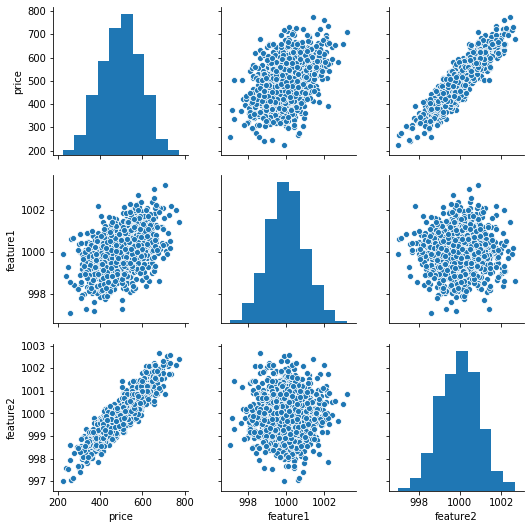

In [6]:
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
X_train.shape

(700, 2)

In [10]:
X_test.shape

(300, 2)

In [11]:
y_train.shape

(700,)

In [12]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing.data:

class MinMaxScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Transforms features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), de

In [15]:
scaler = MinMaxScaler()

In [16]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [17]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [31]:
import tensorflow as tf

In [32]:
from tensorflow.keras.models import Sequential

In [33]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense(32))
 |  model.add(Dense(32))
 |  model.com

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [42]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [43]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Let's go ahead and build a simple model and then compile it by defining our solver

In [44]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [45]:
model.fit(X_train,y_train,epochs=350)

Epoch 1/350
700/700 [==============================] - 0s 635us/sample - loss: 256480.8727
Epoch 2/350
700/700 [==============================] - 0s 140us/sample - loss: 256373.6824
Epoch 3/350
700/700 [==============================] - 0s 78us/sample - loss: 256261.3776
Epoch 4/350
700/700 [==============================] - 0s 61us/sample - loss: 256134.0522
Epoch 5/350
700/700 [==============================] - 0s 100us/sample - loss: 255990.6906
Epoch 6/350
700/700 [==============================] - 0s 71us/sample - loss: 255830.0472
Epoch 7/350
700/700 [==============================] - 0s 61us/sample - loss: 255651.1049
Epoch 8/350
700/700 [==============================] - 0s 66us/sample - loss: 255451.3573
Epoch 9/350
700/700 [==============================] - 0s 96us/sample - loss: 255229.9561
Epoch 10/350
700/700 [==============================] - 0s 66us/sample - loss: 254987.0667
Epoch 11/350
700/700 [==============================] - 0s 72us/sample - loss: 254719.1709
Epoch

700/700 [==============================] - 0s 60us/sample - loss: 1874.9718
Epoch 92/350
700/700 [==============================] - 0s 56us/sample - loss: 1681.4369
Epoch 93/350
700/700 [==============================] - 0s 66us/sample - loss: 1635.2310
Epoch 94/350
700/700 [==============================] - 0s 62us/sample - loss: 1611.7376
Epoch 95/350
700/700 [==============================] - 0s 62us/sample - loss: 1583.7055
Epoch 96/350
700/700 [==============================] - 0s 64us/sample - loss: 1561.9252
Epoch 97/350
700/700 [==============================] - 0s 75us/sample - loss: 1537.3982
Epoch 98/350
700/700 [==============================] - 0s 63us/sample - loss: 1511.4319
Epoch 99/350
700/700 [==============================] - 0s 63us/sample - loss: 1488.9816
Epoch 100/350
700/700 [==============================] - 0s 62us/sample - loss: 1461.8791
Epoch 101/350
700/700 [==============================] - 0s 54us/sample - loss: 1437.8647
Epoch 102/350
700/700 [=========

700/700 [==============================] - 0s 63us/sample - loss: 60.7531
Epoch 184/350
700/700 [==============================] - 0s 67us/sample - loss: 55.9855
Epoch 185/350
700/700 [==============================] - 0s 76us/sample - loss: 52.4187
Epoch 186/350
700/700 [==============================] - 0s 61us/sample - loss: 49.9300
Epoch 187/350
700/700 [==============================] - 0s 67us/sample - loss: 46.6802
Epoch 188/350
700/700 [==============================] - 0s 59us/sample - loss: 43.9714
Epoch 189/350
700/700 [==============================] - 0s 68us/sample - loss: 40.9010
Epoch 190/350
700/700 [==============================] - 0s 59us/sample - loss: 38.6951
Epoch 191/350
700/700 [==============================] - 0s 65us/sample - loss: 36.6553
Epoch 192/350
700/700 [==============================] - 0s 59us/sample - loss: 35.1588
Epoch 193/350
700/700 [==============================] - 0s 59us/sample - loss: 33.2105
Epoch 194/350
700/700 [=======================

700/700 [==============================] - 0s 60us/sample - loss: 24.1587
Epoch 277/350
700/700 [==============================] - 0s 63us/sample - loss: 24.2761
Epoch 278/350
700/700 [==============================] - 0s 61us/sample - loss: 24.5570
Epoch 279/350
700/700 [==============================] - 0s 62us/sample - loss: 24.2813
Epoch 280/350
700/700 [==============================] - 0s 64us/sample - loss: 24.0759
Epoch 281/350
700/700 [==============================] - 0s 70us/sample - loss: 24.3573
Epoch 282/350
700/700 [==============================] - 0s 69us/sample - loss: 23.9278
Epoch 283/350
700/700 [==============================] - 0s 65us/sample - loss: 24.0828
Epoch 284/350
700/700 [==============================] - 0s 60us/sample - loss: 24.3630
Epoch 285/350
700/700 [==============================] - 0s 54us/sample - loss: 23.8548
Epoch 286/350
700/700 [==============================] - 0s 63us/sample - loss: 23.9897
Epoch 287/350
700/700 [=======================

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [40]:
model.history.history

{'loss': [24.035084729875837,
  24.259593396868024,
  24.26343920026507,
  24.180360477992465,
  24.187115642002652,
  24.32201169695173,
  24.139500470842634,
  24.006419405256,
  24.37799329485212,
  24.25387688773019,
  24.084904469081334,
  24.113906260899135,
  24.22298968723842,
  24.09154389517648,
  24.198229348318918,
  24.435797544206892,
  24.182776282174245,
  23.93026896885463,
  23.902533460344586,
  24.26313485281808,
  24.103827427455357,
  24.26469255719866,
  23.92552952357701,
  24.229397615705217,
  24.102238028390065,
  23.82182271684919,
  24.096507459368024,
  24.313452954973492,
  24.286476794651577,
  24.141680995396204,
  24.081624385288784,
  24.281794673374723,
  24.490572695050922,
  23.92883579799107,
  24.103184084211076,
  24.506467165265764,
  24.354296798706056,
  24.260744988577706,
  23.978467134748186,
  24.437309123447964,
  24.174767129080635,
  24.291672439575194,
  24.043331909179688,
  24.1112935093471,
  24.038516693115234,
  23.96136070251465

In [46]:
loss = model.history.history['loss']

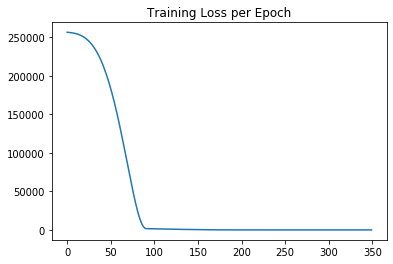

In [47]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [48]:
model.metrics_names

['loss']

In [49]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [50]:
training_score

24.008543287004745

In [51]:
test_score

24.952653630574545

### Further Evaluations

In [52]:
test_predictions = model.predict(X_test)

In [53]:
test_predictions

array([[405.04938],
       [623.36865],
       [591.9532 ],
       [572.0335 ],
       [366.3535 ],
       [578.99274],
       [514.8371 ],
       [458.8886 ],
       [549.0454 ],
       [447.29794],
       [611.61145],
       [548.7615 ],
       [418.86325],
       [408.6282 ],
       [651.09076],
       [437.0722 ],
       [508.2535 ],
       [659.7635 ],
       [662.42145],
       [565.35236],
       [333.95938],
       [444.60562],
       [382.27505],
       [378.5068 ],
       [566.4056 ],
       [610.4119 ],
       [532.1895 ],
       [427.62833],
       [655.27765],
       [413.84824],
       [442.41202],
       [484.9133 ],
       [438.18564],
       [681.6916 ],
       [424.53073],
       [417.44565],
       [501.72925],
       [550.28235],
       [509.51868],
       [395.104  ],
       [618.42145],
       [416.395  ],
       [604.27466],
       [445.74033],
       [501.7797 ],
       [581.54346],
       [668.8535 ],
       [490.19403],
       [318.316  ],
       [485.21182],


In [55]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [56]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
5,584.381108
6,514.405641
7,464.115870
8,551.650100
9,451.804172


In [59]:
test_predictions = pd.Series(test_predictions)

In [60]:
test_predictions

0      405.049377
1      623.368652
2      591.953186
3      572.033508
4      366.353485
5      578.992737
6      514.837097
7      458.888611
8      549.045410
9      447.297943
10     611.611450
11     548.761475
12     418.863251
13     408.628204
14     651.090759
15     437.072205
16     508.253510
17     659.763489
18     662.421448
19     565.352356
20     333.959381
21     444.605621
22     382.275055
23     378.506805
24     566.405579
25     610.411926
26     532.189514
27     427.628326
28     655.277649
29     413.848236
          ...    
270    564.312805
271    447.794342
272    534.219543
273    381.548309
274    501.314056
275    636.945862
276    496.350739
277    568.208496
278    469.895233
279    273.036682
280    517.163940
281    621.237244
282    350.259308
283    450.220398
284    499.083435
285    542.784973
286    611.663391
287    387.930389
288    449.173859
289    482.205292
290    598.143311
291    499.172577
292    321.193878
293    554.960022
294    444

In [61]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [62]:
pred_df.columns = ['Test Y','Model Predictions']

In [63]:
pred_df

,Test Y,Model Predictions
0,402.296319,405.049377
1,624.156198,623.368652
2,582.455066,591.953186
3,578.588606,572.033508
4,371.224104,366.353485
5,584.381108,578.992737
6,514.405641,514.837097
7,464.115870,458.888611
8,551.650100,549.045410
9,451.804172,447.297943


Let's compare to the real test labels!

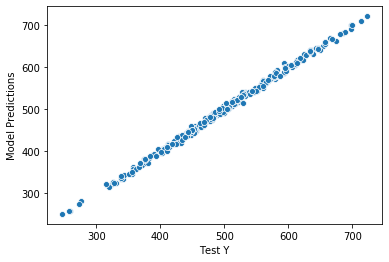

In [64]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [65]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

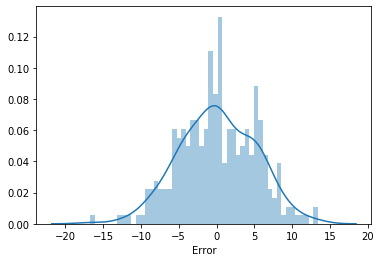

In [66]:
sns.distplot(pred_df['Error'],bins=50)

In [67]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [68]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

3.9977731203254523

In [69]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

24.952656935480906

In [70]:
# Essentially the same thing, difference just due to precision
test_score

24.952653630574545

In [71]:
#RMSE
test_score**0.5

4.995263119253534

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [72]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [73]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [74]:
new_gem = scaler.transform(new_gem)

In [75]:
model.predict(new_gem)

array([[419.44116]], dtype=float32)

## Saving and Loading a Model

In [76]:
from tensorflow.keras.models import load_model

In [77]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [78]:
later_model = load_model('my_model.h5')

In [79]:
later_model.predict(new_gem)

array([[419.44116]], dtype=float32)